In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

# Videogame Sales up to Year 2017, sales in millions

In [2]:
vgs = pd.read_csv("vgSalesGlobale.csv")

In [3]:
vgs.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
vgs.head(100)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
98,99,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.37


In [6]:
vgs.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [7]:
# Clean column names
vgs.columns = vgs.columns.str.strip()

In [8]:
# Check for null values in the dataset
vgs.isnull().values.any()

True

In [9]:
# Check which columns contain null values
vgs.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [10]:
# Year and Publisher contain null values
# Drop rows with missing data
vgs = vgs.dropna(axis=0, subset=['Year','Publisher'])

In [11]:
# Double check all null values removed from dataset
vgs.isnull().values.any()

False

In [12]:
# Convert Year to integer format
vgs["Year"] =vgs["Year"].astype(int)

In [13]:
# I noticed below that there was a game noted as being released in 2020 which shouldn't be the case

latest_year = vgs[vgs["Year"]==2020]
latest_year

# It turned out to be Imagine: Makeup Artist which actually came out in 2009
vgs['Year'] = vgs['Year'].replace(2020, 2009)

In [14]:
# Data from 2017 look incomplete, so I removed 2017's data

vgs = vgs[vgs.Year<2017]

In [15]:
games = vgs['Name'].unique()
publishers = vgs['Publisher'].unique()
platforms = vgs['Platform'].unique()
genres = vgs['Genre'].unique()

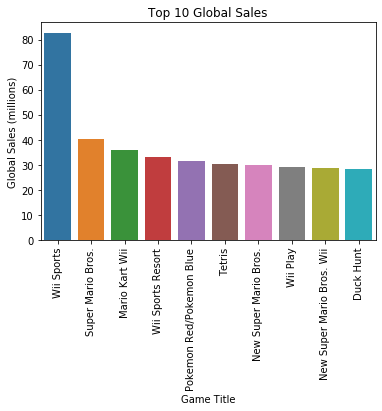

In [16]:
# Top 10 best-selling games since 1982

vgs_head = vgs.head(10)

sns.barplot(x="Name", y="Global_Sales", data=vgs_head)
plt.title('Top 10 Global Sales')
plt.xlabel('Game Title')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=90)
plt.show()

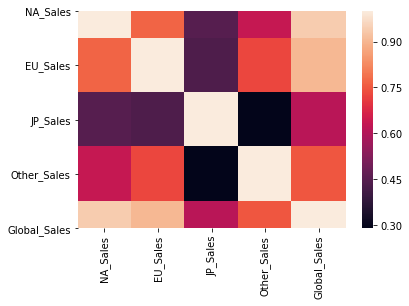

<Figure size 432x288 with 0 Axes>

In [17]:
# Heatmap of numerical variables
small_vgs = vgs[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]

corr = small_vgs.corr()
sns.heatmap(corr)
plt.show()
plt.savefig("Sales Heatmap.png")

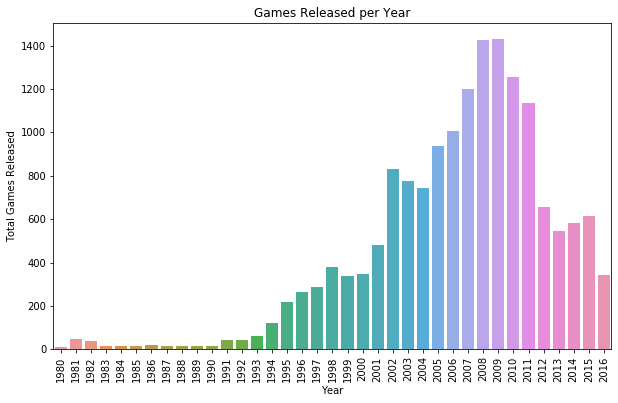

In [18]:
# Plot of Games Released per Year

games_released = vgs.groupby(by='Year').Name.count()

plt.figure(figsize=(10,6))

sns.barplot(x =games_released.index,y =games_released.values)
plt.xticks(rotation=90)
plt.ylabel('Total Games Released')
plt.title('Games Released per Year')
plt.savefig("Games Released per Year.png")

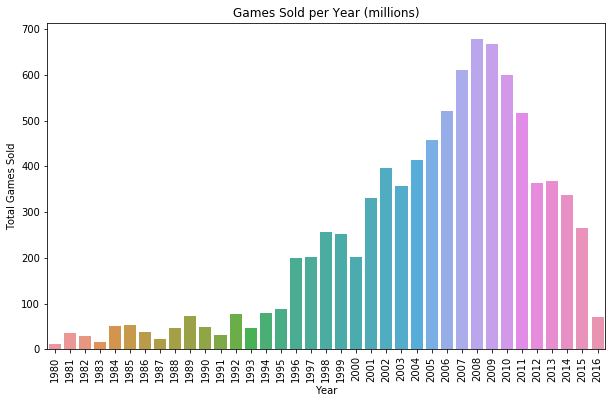

In [19]:
# Plot of Games Sold per Year

games_sold = vgs.groupby(by='Year').Global_Sales.sum()

plt.figure(figsize=(10,6))

sns.barplot(x =games_sold.index,y =games_sold.values)
plt.xticks(rotation=90)
plt.ylabel('Total Games Sold')
plt.title('Games Sold per Year (millions)')
plt.savefig("Games Sold per Year.png")

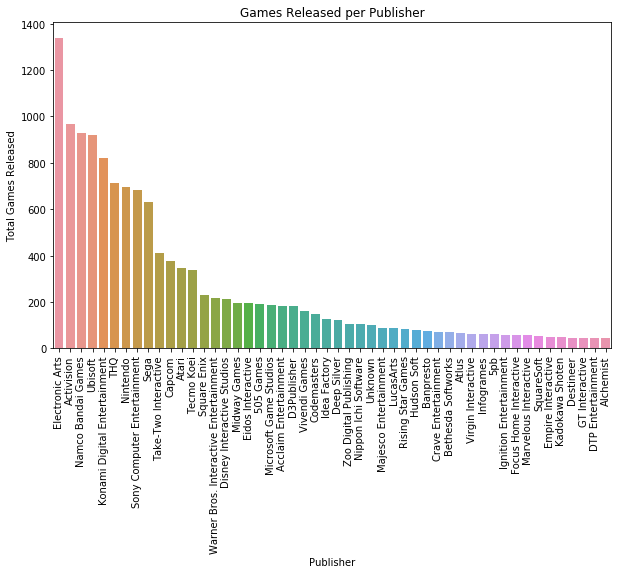

In [20]:
# Video Game Releases by Publisher
pubwiserelease =  vgs.groupby(by='Publisher').Name.count().sort_values(ascending=False)
pubwiserelease = pubwiserelease.head(50)

plt.figure(figsize=(10,6))

sns.barplot(x=pubwiserelease.index,y=pubwiserelease.values)
plt.xticks(rotation=90)
plt.ylabel('Total Games Released')
plt.title('Games Released per Publisher')
plt.savefig("Games Released per Publisher.png")

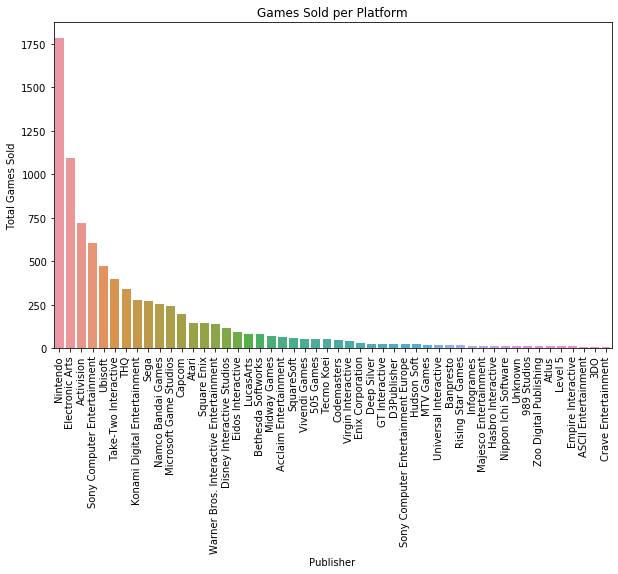

In [21]:
# Video Game Sales by Publisher
pubwisesale =  vgs.groupby(by='Publisher').Global_Sales.sum().sort_values(ascending=False)
pubwisesale = pubwisesale.head(50)

plt.figure(figsize=(10,6))

sns.barplot(x=pubwisesale.index,y=pubwisesale.values)
plt.xticks(rotation=90)
plt.ylabel('Total Games Sold')
plt.title('Games Sold per Platform')
plt.savefig("Games Sold per Platform.png")

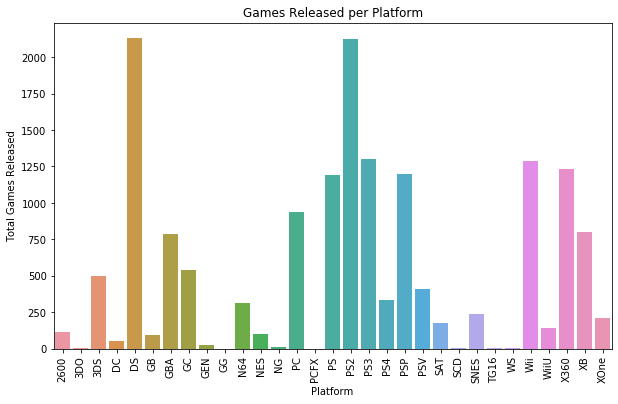

In [22]:
# Video Game Releases by Platform
platwiserelease =  vgs.groupby(by='Platform').Name.count()

plt.figure(figsize=(10,6))

sns.barplot(x =platwiserelease.index,y =platwiserelease.values)
plt.xticks(rotation=90)
plt.ylabel('Total Games Released')
plt.title('Games Released per Platform')
plt.savefig("Games Released per Platform.png")

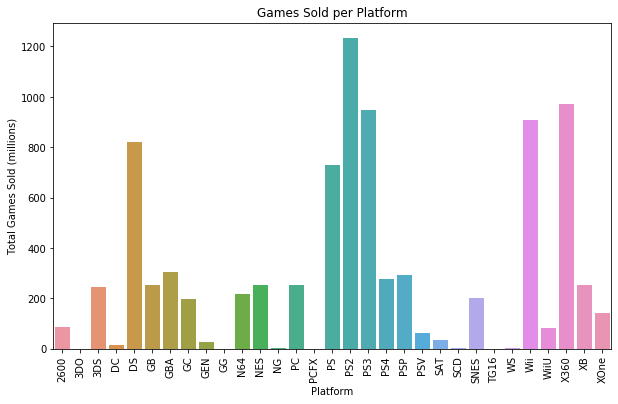

In [23]:
# Video Game Sales by Platform
platwisesale =  vgs.groupby(by='Platform').Global_Sales.sum()

plt.figure(figsize=(10,6))

sns.barplot(x =platwisesale.index,y =platwisesale.values)
plt.xticks(rotation=90)
plt.ylabel('Total Games Sold (millions)')
plt.title('Games Sold per Platform')
plt.savefig("Games Sold per Platform.png")

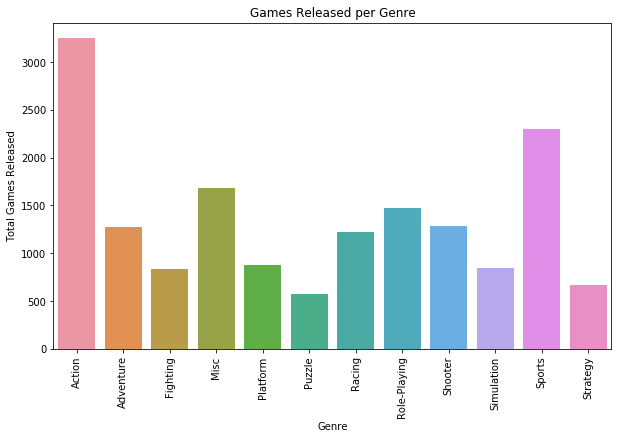

In [24]:
# Video Game Releases by Genre
genwiserelease =  vgs.groupby(by='Genre').Name.count()

plt.figure(figsize=(10,6))

sns.barplot(x =genwiserelease.index,y =genwiserelease.values)
plt.xticks(rotation=90)
plt.ylabel('Total Games Released')
plt.title('Games Released per Genre')
plt.savefig("Games Released per Genre.png")

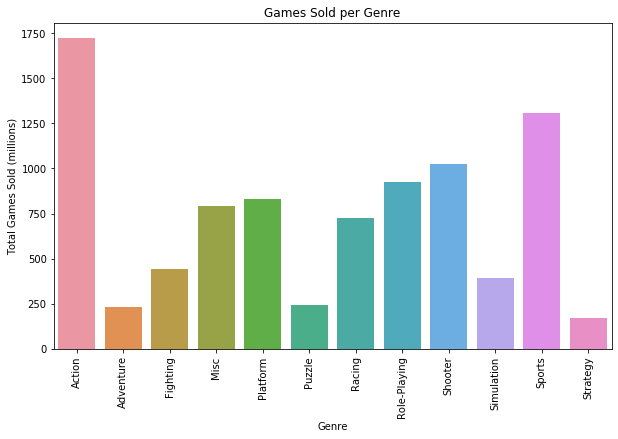

In [25]:
# Video Game Sales by Genre
genwisesale =  vgs.groupby(by='Genre').Global_Sales.sum()

plt.figure(figsize=(10,6))

sns.barplot(x =genwisesale.index,y =genwisesale.values)
plt.xticks(rotation=90)
plt.ylabel('Total Games Sold (millions)')
plt.title('Games Sold per Genre')
plt.savefig("Games Sold per Genre.png")

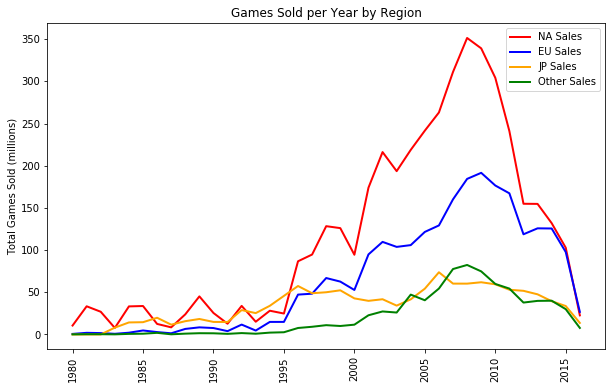

In [26]:
regionwisesale =  vgs.groupby('Year')[('NA_Sales','EU_Sales','JP_Sales','Other_Sales')].sum().reset_index()

plt.figure(figsize=(10,6))

plt.plot( 'Year', 'NA_Sales', data=regionwisesale, marker='', color='red', linewidth=2, label="NA Sales")
plt.plot( 'Year', 'EU_Sales', data=regionwisesale, marker='', color='blue', linewidth=2, label="EU Sales")
plt.plot( 'Year', 'JP_Sales', data=regionwisesale, marker='', color='orange', linewidth=2, label="JP Sales")
plt.plot( 'Year', 'Other_Sales', data=regionwisesale, marker='', color='green', linewidth=2, label="Other Sales")

plt.legend()

plt.xticks(rotation=90)
plt.ylabel('Total Games Sold (millions)')
plt.title('Games Sold per Year by Region')
plt.savefig("Games Sold per Year by Region.png")

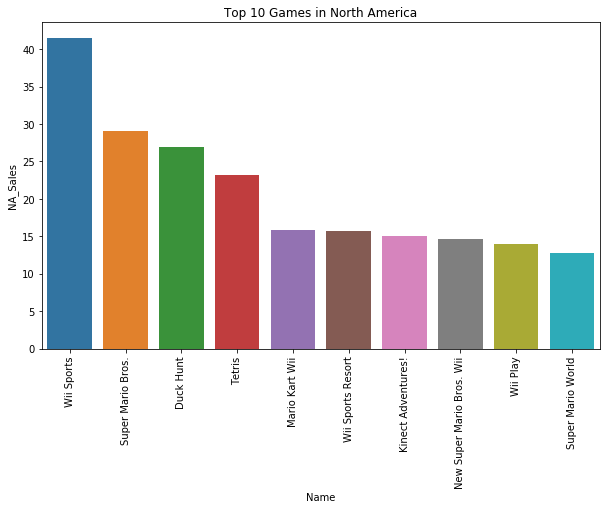

OSError: [Errno 22] Invalid argument

<Figure size 432x288 with 0 Axes>

In [27]:
vgs_NA = vgs.sort_values(by='NA_Sales', ascending=False)
vgs_NA = vgs_NA.head(10)

plt.figure(figsize=(10,6))

sns.barplot(x=vgs_NA.Name, y=vgs_NA.NA_Sales)
plt.title('Top 10 Games in North America')
plt.xticks(rotation=90)
plt.show()
plt.savefig("Top 10 Games in NA.png")

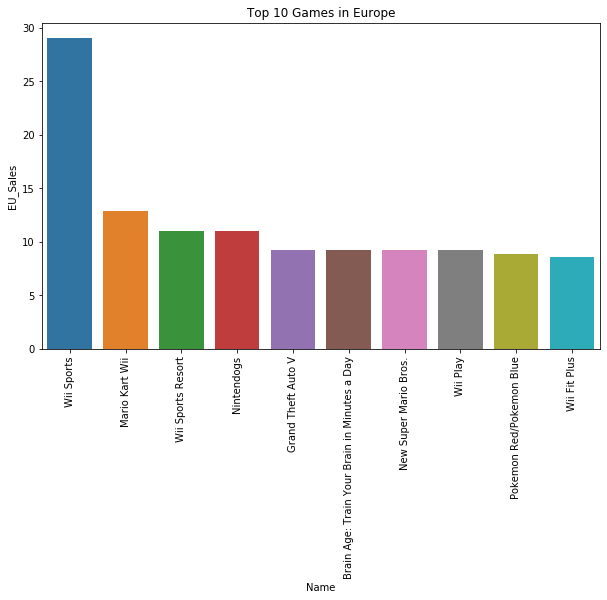

OSError: [Errno 22] Invalid argument

<Figure size 432x288 with 0 Axes>

In [28]:
vgs_EU = vgs.sort_values(by='EU_Sales', ascending=False)
vgs_EU = vgs_EU.head(10)

plt.figure(figsize=(10,6))

sns.barplot(x=vgs_EU.Name, y=vgs_EU.EU_Sales)
plt.title('Top 10 Games in Europe')
plt.xticks(rotation=90)
plt.show()
plt.savefig("Top 10 Games in EU.png")

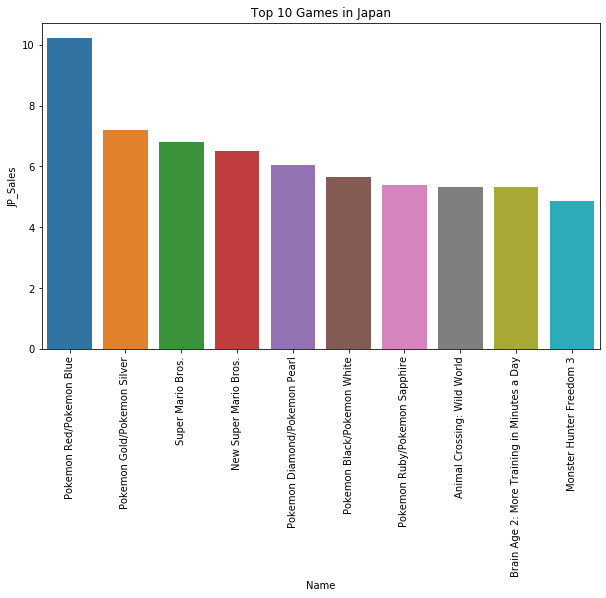

OSError: [Errno 22] Invalid argument

<Figure size 432x288 with 0 Axes>

In [29]:
vgs_JP = vgs.sort_values(by='JP_Sales', ascending=False)
vgs_JP = vgs_JP.head(10)

plt.figure(figsize=(10,6))

sns.barplot(x=vgs_JP.Name, y=vgs_JP.JP_Sales)
plt.title('Top 10 Games in Japan')
plt.xticks(rotation=90)
plt.show()
plt.savefig("Top 10 Games in JP.png")

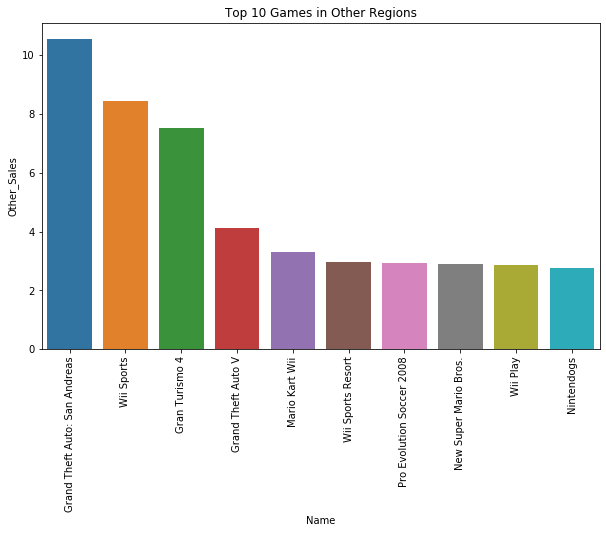

OSError: [Errno 22] Invalid argument

<Figure size 432x288 with 0 Axes>

In [30]:
vgs_Other = vgs.sort_values(by='Other_Sales', ascending=False)
vgs_Other = vgs_Other.head(10)

plt.figure(figsize=(10,6))

sns.barplot(x=vgs_Other.Name, y=vgs_Other.Other_Sales)
plt.title('Top 10 Games in Other Regions')
plt.xticks(rotation=90)
plt.show()
plt.savefig("Top 10 Games in Other.png")

In [ ]:
# Predicting North American Sales based off EU and Japanese Sales

from sklearn import datasets
from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import scale

In [31]:
# Converting sales from floats into integer by multiplying them to their actual values in millions

vgs["NA_Sales"] = round(vgs["NA_Sales"])
vgs["EU_Sales"] = round(vgs["EU_Sales"])
vgs["JP_Sales"] = round(vgs["JP_Sales"])
vgs["Other_Sales"] = round(vgs["Other_Sales"])
vgs["Global_Sales"] = round(vgs["Global_Sales"])


X = vgs.drop(['Rank','Name','Platform','Year','Genre','Publisher','NA_Sales','Global_Sales'], axis=1).values
X.shape

Y = vgs['NA_Sales'].values
Y.shape

(16288,)

In [32]:
from sklearn.preprocessing import scale
scaled_data = scale(X)

In [33]:
# Hierarchical Clustering

from sklearn import cluster
from sklearn.preprocessing import LabelEncoder

AffLink = []
silhouette_score = []
completeness_score = []
homogeneity_score = []

n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
aff = ["euclidean", "l1", "l2", "manhattan", "cosine"]
link = ["ward", "complete", "average"]
for a in aff:
    for l in link:
        if(l=="ward" and a!="euclidean"):
            continue
        else:
            print(a,l)
            AffLink.append(a+l)
            model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage=l, affinity=a)
            model.fit(scaled_data)
            silhouette_score.append(round(metrics.silhouette_score(scaled_data, model.labels_),3))
            print(metrics.silhouette_score(scaled_data, model.labels_))
            completeness_score.append(round(metrics.completeness_score(Y2, model.labels_),3))
            print(metrics.completeness_score(Y2, model.labels_))
            homogeneity_score.append(round(metrics.homogeneity_score(Y2, model.labels_),3))
            print(metrics.homogeneity_score(Y2, model.labels_))
            print("")

euclidean ward


NameError: name 'metrics' is not defined

In [ ]:
# Creating graph of results

Hierarchical = pd.DataFrame(list(zip(AffLink, silhouette_score,completeness_score,homogeneity_score)), 
               columns =['affinity_linkage', 'silhouette_score','completeness_score','homogeneity_score'])


# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = Hierarchical['silhouette_score']
bars2 = Hierarchical['completeness_score']
bars3 = Hierarchical['homogeneity_score']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='Silhouette Score')
plt.bar(r2, bars2, color='orange', width=barWidth, edgecolor='white', label='Completeness Score')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='Homogeneity Score')
 
# Add xticks on the middle of the group bars
plt.xlabel('Affinity/Linkage', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['euclidean ward',
                            'euclidean complete',
                            'euclidean average',
                            'l1 complete',
                            'l1 average',
                            'l2 complete',
                            'l2 average',
                            'manhattan complete',
                            'manhattan average',
                            'cosine complete',
                            'cosine average'])
 
# Create legend & Show graphic
plt.legend()
plt.xticks(rotation=90)
plt.show()
plt.savefig("Hierarchical Clustering Comparison.png")

In [ ]:
# Kmeans Clustering

silhouette_score = []
completeness_score = []
homogeneity_score = []

n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
for k in range(2, 30):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    print(k)
    print(metrics.silhouette_score(scaled_data, kmeans.labels_))
    silhouette_score.append(metrics.silhouette_score(scaled_data, kmeans.labels_))
    print(metrics.completeness_score(Y2, kmeans.labels_))
    completeness_score.append(metrics.completeness_score(Y2, kmeans.labels_))
    print(metrics.homogeneity_score(Y2, kmeans.labels_))
    homogeneity_score.append(metrics.homogeneity_score(Y2, kmeans.labels_))
    print("")

In [ ]:
clusters = my_list = list(range(2,30))

Kmeans = pd.DataFrame(list(zip(clusters, silhouette_score,completeness_score,homogeneity_score)), 
               columns =['clusters', 'silhouette','completeness','homogeneity'])

fig = plt.figure(figsize=(10,6))
ax = fig.gca()

plt.plot( 'clusters', 'silhouette', data=Kmeans, marker='', color='red', linewidth=2, label="Silhouette Score")
plt.plot( 'clusters', 'completeness', data=Kmeans, marker='', color='blue', linewidth=2, label="Completeness Score")
plt.plot( 'clusters', 'homogeneity', data=Kmeans, marker='', color='green', linewidth=2, label="Homogeneity Score")

ax.set_xticks(np.arange(0, 30, 1))
ax.set_yticks(np.arange(0, 1., 0.1))
plt.grid()

plt.legend()

plt.xlabel('Number of Clusters')
plt.title('Kmeans Clustering Comparison')
plt.savefig("Kmeans Clustering Comparison.png")

In [ ]:
# Predicting Region from sales performance

# Reshaping data to separate region and sales into two separate columns
vgs_small = vgs.drop(['Rank'], axis=1)

vgs_small=pd.melt(vgs_small,id_vars=(['Name','Year','Platform','Genre','Publisher']),var_name='Region', value_name='Sales')

vgs_small['Region'] = vgs_small['Region'].str.rstrip('_ales')
vgs_small['Region'] = vgs_small['Region'].str.rstrip('_S')

# Preparing data for supervised learning

X_vgs = vgs_small.drop(['Name','Platform','Genre','Year','Publisher','Region'], axis=1).values
X_vgs.shape

Y_vgs = vgs_small['Region'].values
Y_vgs.shape

scaled_data = scale(X_vgs)

from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(scaled_data, Y_vgs,random_state=1)

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()
lm.fit(X_train, Y_train)
lm.predict_proba(X_test)
y_model = lm.predict(X_test)

print(metrics.classification_report(Y_test, y_model))
print(metrics.confusion_matrix(Y_test, y_model))

from sklearn.metrics import accuracy_score
print("\nAccuracy Score: " + str(accuracy_score(Y_test, y_model)))

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
print(model)
y_model = model.predict(X_test)
print(metrics.classification_report(Y_test, y_model))
print(metrics.confusion_matrix(Y_test, y_model))

print("\nAccuracy Score: " + str(accuracy_score(Y_test, y_model)))

mat = confusion_matrix(Y_test, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
# K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
print(model)
y_model = model.predict(X_test)
print(metrics.classification_report(Y_test, y_model))
print(metrics.confusion_matrix(Y_test, y_model))

print("\nAccuracy Score: " + str(accuracy_score(Y_test, y_model)))

mat = confusion_matrix(Y_test, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)
print(model)
y_model = model.predict(X_test)
print(metrics.classification_report(Y_test, y_model))
print(metrics.confusion_matrix(Y_test, y_model))


print("\nAccuracy Score: " + str(accuracy_score(Y_test, y_model)))

mat = confusion_matrix(Y_test, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');